## World Cup Data Analysis 

I've mostly used the pandas library for the analysis and for tackling the tasks. Another practical approach for this type of tasks would be to use simply SQL, given the file is stored as a table in some database. 

Firstly I've conducted a basic data analysis & cleaning: In this stage I've investigated both the .csv file itself and the dataframe imported into this Notebook. I've tried to spot any major incongruencies as of missing data, duplicates and data types. One important aspect is the role the different World Cup formats (e.g. different number/type of stages) across the years plays on some of the columns.

After this part, I've presented a solution for the problems of both Problems (1 & 2) divided in sections of 5 sub-tasks each. Whenever it was important I've entered some markdown text with relevant information or insights. 

In the sub-task 2.3 I've extracted the altitude (or elevation) information from an external website with the requests library. Because I've used a specific proxy info for that and because the procedure takes some time, I've decided to comment this part of the code out. I'm sending to you, however, a .csv file (*elevation_dict.csv*) containing the requested information. This file is called in a further cell, so you can re-run everything without worring about the requests.

In the end you will find Problem 3 (where I analyse the power of tradition in World Cups). I've also added a TO-DO list at the end. This list shows some things I have not been able to do due to lack of time. Besides that I also suggest interesting analysis that could be carried out with this data in combination with other external data.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import requests
import time
import datetime as dt

In [2]:
# IMPORT DATA

df = pd.read_csv('WorldCupMatches.csv')
# delete full empty rows (,,,,,,,,,,,,,,,,,,,) at the end of the file
df=df.dropna(how='all')

In [3]:
df.dtypes

Year                    float64
Datetime                 object
Stage                    object
Stadium                  object
City                     object
Home Team Name           object
Home Team Goals         float64
Away Team Goals         float64
Away Team Name           object
Win conditions           object
Attendance              float64
Half-time Home Goals    float64
Half-time Away Goals    float64
Referee                  object
Assistant 1              object
Assistant 2              object
RoundID                 float64
MatchID                 float64
Home Team Initials       object
Away Team Initials       object
dtype: object

It looks like all numerical columns are floats (many should be integers instead - e.g. Goals). I will keep that in mind and deal with it later

As a sanity check I've decided to count the number of matches in each world cup since 1930. I've used the following source as reference:
https://www.statista.com/statistics/269030/soccer-world-cup-number-of-games-played-in-each-tournament-since-1930/

It looks like all editions are correct, except the last one (2014): **That's really mean, because with duplicate data, Brazil is losing 7x1 to Germany 2 times! :-D**

In [4]:
# NUMBER OF MATCHES PER YEAR
nr_matches = df.groupby('Year')['Year'].count()
nr_matches

Year
1930.0    18
1934.0    17
1938.0    18
1950.0    22
1954.0    26
1958.0    35
1962.0    32
1966.0    32
1970.0    32
1974.0    38
1978.0    38
1982.0    52
1986.0    52
1990.0    52
1994.0    52
1998.0    64
2002.0    64
2006.0    64
2010.0    64
2014.0    80
Name: Year, dtype: int64

In [5]:
df = df.drop_duplicates()
print(df.groupby('Year')['Year'].count())

Year
1930.0    18
1934.0    17
1938.0    18
1950.0    22
1954.0    26
1958.0    35
1962.0    32
1966.0    32
1970.0    32
1974.0    38
1978.0    38
1982.0    52
1986.0    52
1990.0    52
1994.0    52
1998.0    64
2002.0    64
2006.0    64
2010.0    64
2014.0    64
Name: Year, dtype: int64


After checking the number of matches is correct I'm going to check it there are NaN values in the remaining fields.

In [6]:
df.isna().sum()

Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              1
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

In [7]:
df[df.isnull().any(axis=1)]

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
823,2014.0,30 Jun 2014 - 17:00,Round of 16,Estadio Beira-Rio,Porto Alegre,Germany,2.0,1.0,Algeria,Germany win after extra time,NaN,0.0,0.0,RICCI Sandro (BRA),DE CARVALHO Emerson (BRA),VAN GASSE Marcelo (BRA),255951.0,300186460.0,GER,ALG


The column "Attendance" has 1 missing value. As seen above it is the Match Germany X Algeria. According to Wikipedia, this match an attendance of **43,063**, so I'm adding this value to the correspondent row

In [8]:
df.loc[823, 'Attendance'] = 43063

### Changing Column Types

In the beginning of the analysis we saw that all numerical data are treated as float64 - these fields are:
- Year
- Home Team Goals
- Away Team Goals
- Attendance
- Half-time Home Goals
- Half-time Away Goals
- RoundID
- MatchID

All these fields should be integer instead of float (maybe not Year, but since we already have Datetime it does not matter too much)             

In [9]:
float_columns = df.select_dtypes(include=['float64']).columns
df[float_columns] = df[float_columns].astype(int)

Finally I will change the datatype from String from string to Datetime

In [10]:
df['Datetime'] = pd.to_datetime(df['Datetime'])
df.dtypes

Year                             int32
Datetime                datetime64[ns]
Stage                           object
Stadium                         object
City                            object
Home Team Name                  object
Home Team Goals                  int32
Away Team Goals                  int32
Away Team Name                  object
Win conditions                  object
Attendance                       int32
Half-time Home Goals             int32
Half-time Away Goals             int32
Referee                         object
Assistant 1                     object
Assistant 2                     object
RoundID                          int32
MatchID                          int32
Home Team Initials              object
Away Team Initials              object
dtype: object

### Cleaning Team Names

In [11]:
df['Home Team Name'].value_counts()

Brazil                      78
Italy                       57
Argentina                   52
Germany FR                  43
England                     35
                            ..
rn">Trinidad and Tobago      1
rn">United Arab Emirates     1
New Zealand                  1
Norway                       1
Canada                       1
Name: Home Team Name, Length: 78, dtype: int64

After some data analysis I've found that some countries have wrong names or have additional characters:
- 'rn">' in **rn">Serbia and Montenegro**
- **Côte d'Ivoire** has an uFFFD char and is substituted by **Ivory Coast** (the name in English)
- Iran is written both as **'IR Iran'** and **'Iran'**: we keep only the latter

In [12]:
# removes the substring rn"> from the team names
def clean_team_names(name):
    if 'rn">' in name:        
        return name.replace('rn">','')
    if 'Ivoire' in name:
        return 'Ivory Coast'
    if name == 'IR Iran':
        return 'Iran'
    else:
        return name

df['Home Team Name'] = df['Home Team Name'].apply(clean_team_names)
df['Away Team Name'] = df['Away Team Name'].apply(clean_team_names)

# Problem 1 - Given the data WorldCupMatches.csv obtain the following, per World Cup:

### 1.1 - Winner, Runners-up, Third and Fourth ranked team of the World Cup

- In 1930 no match for the 3rd place was played
- In 1950 the final stage was a round-robin group of four teams. 

I'm going to input this information to the dataframe - see below

In [13]:
# dataframe with only the final matches
df_finals = df[df['Stage'] == 'Final'].reset_index()

# dataframe with only the 3rd place matches
df_3rd_match = df[ (df['Stage'] == 'Match for third place') | 
                   (df['Stage'] == 'Play-off for third place') | 
                   (df['Stage'] == 'Third place')
                 ].reset_index()
df_finals

,index,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,17,1930,1930-07-30 14:15:00,Final,Estadio Centenario,Montevideo,Uruguay,4,2,Argentina,...,68346,1,2,LANGENUS Jean (BEL),SAUCEDO Ulises (BOL),CRISTOPHE Henry (BEL),405,1087,URU,ARG
1,34,1934,1934-06-10 17:30:00,Final,Nazionale PNF,Rome,Italy,2,1,Czechoslovakia,...,55000,0,0,EKLIND Ivan (SWE),BAERT Louis (BEL),IVANCSICS Mihaly (HUN),3490,1134,ITA,TCH
2,52,1938,1938-06-19 17:00:00,Final,Stade Olympique,Colombes,Italy,4,2,Hungary,...,45000,3,1,CAPDEVILLE Georges (FRA),WUETHRICH Hans (SUI),KRIST Gustav (TCH),3487,1174,ITA,HUN
3,100,1954,1954-07-04 17:00:00,Final,Wankdorf Stadium,Berne,Germany FR,3,2,Hungary,...,62500,2,2,LING William (ENG),ORLANDINI Vincenzo (ITA),GRIFFITHS Benjamin (WAL),3484,1278,FRG,HUN
4,135,1958,1958-06-29 15:00:00,Final,Rasunda Stadium,Solna,Brazil,5,2,Sweden,...,49737,2,1,GUIGUE Maurice (FRA),DUSCH Albert (GER),GARDEAZABAL Juan (ESP),3482,1343,BRA,SWE
5,167,1962,1962-06-17 14:30:00,Final,Nacional,Santiago De Chile,Brazil,3,1,Czechoslovakia,...,68679,1,1,LATYCHEV Nikolaj (URS),HORN Leo (NED),DAVIDSON Bob (SCO),3480,1463,BRA,TCH
6,199,1966,1966-07-30 15:00:00,Final,Wembley Stadium,London,England,4,2,Germany FR,...,96924,0,0,DIENST Gottfried (SUI),BAKHRAMOV Tofik (URS),GALBA Karol (TCH),3478,1633,ENG,FRG
7,231,1970,1970-06-21 12:00:00,Final,Estadio Azteca,Mexico City,Brazil,4,1,Italy,...,107412,1,1,GLOECKNER Rudolf (GDR),SCHEURER Ruedi (SUI),COEREZZA Norberto Angel (ARG),3476,1765,BRA,ITA
8,269,1974,1974-07-07 16:00:00,Final,Olympiastadion,Munich,Netherlands,1,2,Germany FR,...,78200,1,2,TAYLOR John (ENG),GONZALEZ ARCHUNDIA Alfonso (MEX),BARRETO RUIZ Ramon (URU),605,2063,NED,FRG
9,307,1978,1978-06-25 15:00:00,Final,El Monumental - Estadio Monumental Antonio Ves...,Buenos Aires,Argentina,3,1,Netherlands,...,71483,0,0,GONELLA Sergio (ITA),BARRETO RUIZ Ramon (URU),LINEMAYR Erich (AUT),639,2198,ARG,NED


In [14]:
# retrieves either home or away team based on number of goals scored or win_conditions
def winner_loser(home_team, away_team, home_goals, away_goals, win_conditions):
    if home_goals > away_goals:
        winner = home_team
        loser = away_team

    elif home_goals < away_goals:
        winner = away_team
        loser = home_team

    else:
        # if it is a draw: the name of the Winner can be found in 'Win conditions' and the name of the Runner-up cannot 
        if home_team in win_conditions:
            winner = home_team
            loser = away_team
        elif away_team in win_conditions:
            winner = away_team
            loser = home_team
    return [winner, loser]

In [15]:
first_second = df_finals.apply(lambda x : winner_loser(x['Home Team Name'],
                                                       x['Away Team Name'],
                                                       x['Home Team Goals'],
                                                       x['Away Team Goals'],
                                                       x['Win conditions']),axis=1)

third_fourth = df_3rd_match.apply(lambda x : winner_loser(x['Home Team Name'],
                                                          x['Away Team Name'],
                                                          x['Home Team Goals'],
                                                          x['Away Team Goals'],
                                                          x['Win conditions']),axis=1)

In [16]:
df_finals[['Winner', 'Runner-up']] = pd.DataFrame(first_second.tolist())
df_finals_short = df_finals[['Year','Winner', 'Runner-up']]
df_finals_short

,Year,Winner,Runner-up
0,1930,Uruguay,Argentina
1,1934,Italy,Czechoslovakia
2,1938,Italy,Hungary
3,1954,Germany FR,Hungary
4,1958,Brazil,Sweden
5,1962,Brazil,Czechoslovakia
6,1966,England,Germany FR
7,1970,Brazil,Italy
8,1974,Germany FR,Netherlands
9,1978,Argentina,Netherlands


Now I'm going to add the finalists of the World Cup 1950 (Brazil & Uruguay) manually

> *The final stage in 1950 was a round-robin group of four teams. Coincidentally, one of the last two matches pitted together the top two teams (and the only two who could win the title), and the other was between the bottom two teams. Uruguay v Brazil is often considered the de facto final of the 1950 World Cup*<br>
Source: https://en.wikipedia.org/wiki/FIFA_World_Cup#cite_note-wc1950-98

In [17]:
df_finals_short = df_finals_short.append({'Year': 1950, 'Winner': 'Uruguay', 'Runner-up': 'Brazil'}, ignore_index=True)

In [18]:
df_3rd_match[['3rd', '4th']] = pd.DataFrame(third_fourth.tolist())
df_3rd_match_short = df_3rd_match[['Year','3rd', '4th']]
df_3rd_match_short

,Year,3rd,4th
0,1934,Germany,Austria
1,1938,Brazil,Sweden
2,1954,Austria,Uruguay
3,1958,France,Germany FR
4,1962,Chile,Yugoslavia
5,1966,Portugal,Soviet Union
6,1970,Germany FR,Uruguay
7,1974,Poland,Brazil
8,1978,Brazil,Italy
9,1982,Poland,France


Now I'm going to add the 3rd/4th places to the World Cups 1930 & 1950 manually

> *There was no third place match in 1930; the two losing semi-finalists are ranked according to their overall records in the tournament*<br>
Source: https://en.wikipedia.org/wiki/FIFA_World_Cup#cite_note-95

In [19]:
df_3rd_match_short = df_3rd_match_short.append({'Year': 1930, '3rd': 'United States', '4th': 'Yugoslavia'}, ignore_index=True)
df_3rd_match_short = df_3rd_match_short.append({'Year': 1950, '3rd': 'Sweden', '4th': 'Spain'}, ignore_index=True)

Now I will just merge both dataframes on Year to show the complete information

In [20]:
print(pd.merge(df_finals_short, df_3rd_match_short, on='Year').sort_values('Year'))

    Year      Winner       Runner-up            3rd             4th
0   1930     Uruguay       Argentina  United States      Yugoslavia
1   1934       Italy  Czechoslovakia        Germany         Austria
2   1938       Italy         Hungary         Brazil          Sweden
19  1950     Uruguay          Brazil         Sweden           Spain
3   1954  Germany FR         Hungary        Austria         Uruguay
4   1958      Brazil          Sweden         France      Germany FR
5   1962      Brazil  Czechoslovakia          Chile      Yugoslavia
6   1966     England      Germany FR       Portugal    Soviet Union
7   1970      Brazil           Italy     Germany FR         Uruguay
8   1974  Germany FR     Netherlands         Poland          Brazil
9   1978   Argentina     Netherlands         Brazil           Italy
10  1982       Italy      Germany FR         Poland          France
11  1986   Argentina      Germany FR         France         Belgium
12  1990  Germany FR       Argentina          It

### 1.2 - Total goals scored at the World Cup

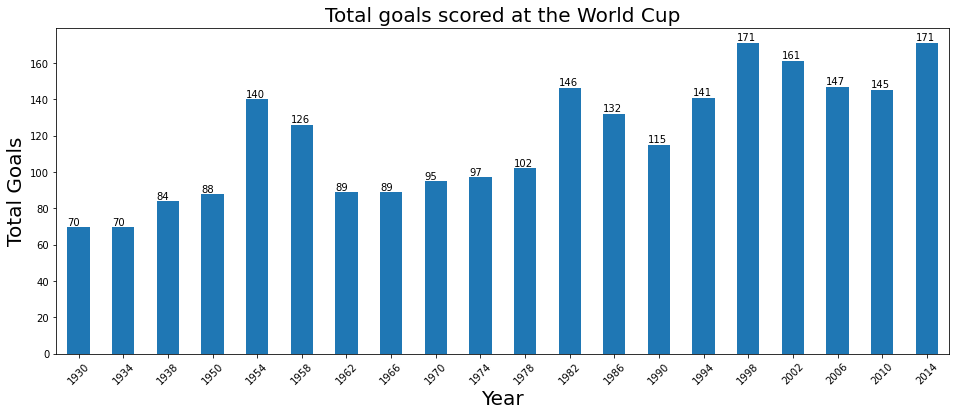

In [21]:
df['Total Goals'] = df['Home Team Goals'] + df['Away Team Goals']

# groupby year and sum total goals
goals_per_year = df.groupby('Year')['Total Goals'].sum()

# plot
fig, ax = plt.subplots(figsize=(16,6))
goals_per_year.plot(ax=ax, kind='bar', rot=45)

plt.title('Total goals scored at the World Cup', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Total Goals', fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

Source for comparison: https://www.statista.com/statistics/269029/number-of-goals-scored-at-fifa-world-cups-since-1930/ <br>
According to this source, the number of goals scored in 2010 was 143 - Wikipedia says it was 145 (agreeing with the value in our dataset)

### 1.3 - Number of qualified teams for the World Cup
It is important to use the function **clean_team_names** defined before to get the accurate number of countries per WC edition

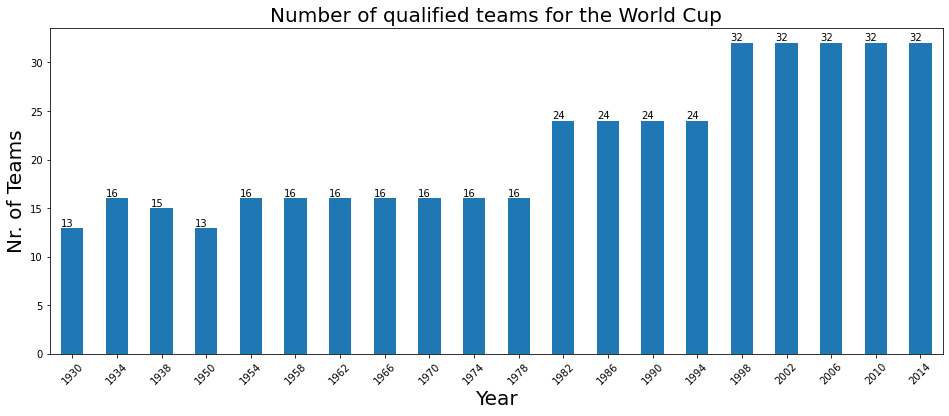

In [22]:
# list of home teams per year
home_teams = df.groupby('Year')['Home Team Name'].apply(list) 

# list of away teams per year
away_teams = df.groupby('Year')['Away Team Name'].apply(list) 

# apply set to get unique team names
all_teams = (home_teams + away_teams).apply(set)

#plot
fig, ax = plt.subplots(figsize=(16,6))
all_teams.apply(len).plot(ax=ax, kind='bar', rot=45)
plt.title('Number of qualified teams for the World Cup', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Nr. of Teams', fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

According to https://en.wikipedia.org/wiki/FIFA_World_Cup the number of teams is correct for all editions

### 1.4 - Number of matches played during the World Cup

I've calculated this one in the beginning :-)

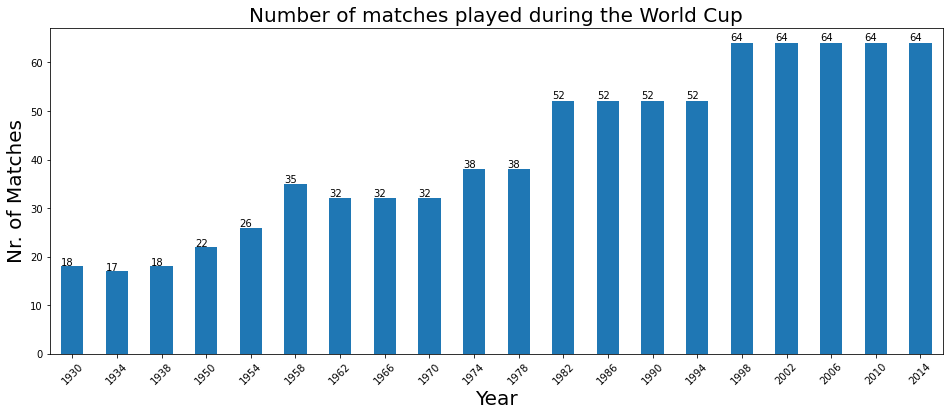

In [23]:
nr_matches = df.groupby('Year')['Year'].count()

#plot
fig, ax = plt.subplots(figsize=(16,6))
nr_matches.plot(ax=ax, kind='bar', rot=45)
plt.title('Number of matches played during the World Cup', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Nr. of Matches', fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

### 1.5 - Total attendance of the World Cup

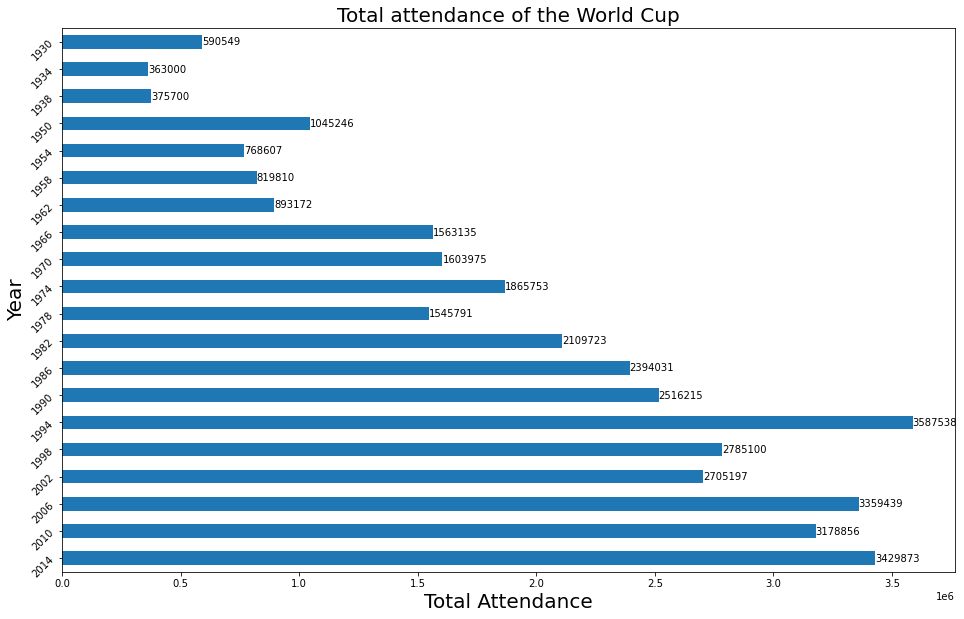

In [24]:
total_attendance = df.groupby('Year')['Attendance'].sum()

#plot
fig, ax = plt.subplots(figsize=(16,10))
total_attendance.plot(ax=ax, kind='barh', rot=45)
plt.title('Total attendance of the World Cup', fontsize=20)
plt.xlabel('Total Attendance', fontsize=20)
plt.ylabel('Year', fontsize=20)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str((i.get_width())))
    
# invert for largest on top 
ax.invert_yaxis()

For the World Cups of 2010 and 2014 the numbers agree with those of Wikipedia
- https://en.wikipedia.org/wiki/2010_FIFA_World_Cup - Attendance: 3,178,856
- https://en.wikipedia.org/wiki/2014_FIFA_World_Cup - Attendance: 3,429,873

# Problem 2 - Given the data WorldCupMatches.csv and any resource you find appropriate, try to obtain answers/estimates to the following questions:

### 2.1 - Can any correlation be found between referees and countries that participated in the all World Cups?

In [25]:
# here I will compare the team initials since referee nationalities are presented in this form
# I'm working here with sets in order to have unique values.

# list of home teams per year
home_teams = df.groupby('Year')['Home Team Initials'].apply(list) 

# list of away teams per year
away_teams = df.groupby('Year')['Away Team Initials'].apply(list) 

# apply set to get unique team names
all_teams = (home_teams + away_teams).apply(set)
all_teams = all_teams.to_frame(name='Team Initials')

# get the initials of the Referee for each match
df['Referee Team Initials'] = df['Referee'].apply(lambda x : x[x.find("(")+1:x.find(")")])  
referee_teams = df.groupby('Year')['Referee Team Initials'].apply(set) 
referee_teams

# add the the all_teams df to have all information in one place
all_teams['Referee Team Initials'] = referee_teams

# count the number of referees present in each WC edition and the number of referees from Non-qualified countries
all_teams['Nr Referee Nationalities'] = all_teams['Referee Team Initials'].apply(len)
all_teams['Referee from Non-qualified Country'] = all_teams['Referee Team Initials'] - all_teams['Team Initials']
all_teams['Nr Referee from Non-qualified Country'] = all_teams['Referee from Non-qualified Country'].apply(len)

In [26]:
all_teams.head(10)

,Team Initials,Referee Team Initials,Nr Referee Nationalities,Referee from Non-qualified Country,Nr Referee from Non-qualified Country
Year,,,,,
1930,"{CHI, YUG, FRA, BEL, MEX, USA, PER, PAR, URU, ...","{CHI, FRA, BEL, URU, ARG, BOL, BRA}",7,{},0
1934,"{HUN, BRA, SUI, NED, GER, FRA, EGY, ITA, TCH, ...","{SUI, NED, GER, ITA, BEL, SWE, AUT}",7,{},0
1938,"{HUN, ROU, SUI, NED, GER, FRA, POL, SWE, ITA, ...","{HUN, SUI, GER, FRA, ITA, BEL, TCH, SWE, AUT}",9,{AUT},1
1950,"{CHI, BRA, SUI, YUG, ITA, MEX, USA, PAR, URU, ...","{SUI, NED, WAL, SWE, ITA, ESP, SCO, BRA, ENG}",9,"{SCO, NED, WAL}",3
1954,"{HUN, KOR, SUI, YUG, FRA, ITA, TCH, MEX, BEL, ...","{HUN, SUI, WAL, FRA, YUG, BEL, ITA, URU, FRG, ...",15,"{ESP, POR, WAL}",3
1958,"{HUN, BRA, FRA, YUG, WAL, NIR, TCH, MEX, URS, ...","{HUN, SUI, GER, ITA, URS, SCO, POR, SWE, ENG, ...",21,"{SUI, NED, GER, FIN, ITA, BEL, URU, ESP, DEN, ...",10
1962,"{CHI, HUN, SUI, YUG, TCH, MEX, ITA, BUL, URS, ...","{CHI, HUN, SUI, NED, GER, FRA, YUG, TCH, ITA, ...",17,"{NED, GER, FRA, BEL, SCO, AUT}",6
1966,"{CHI, HUN, SUI, FRA, PRK, ITA, BUL, MEX, URS, ...","{HUN, SUI, GER, NIR, ITA, URS, SCO, POR, SWE, ...",22,"{ISR, GER, WAL, YUG, EGY, NIR, TCH, SCO, SWE}",9
1970,"{ISR, SWE, ITA, PER, MEX, BEL, BUL, TCH, URS, ...","{SUI, GER, ITA, URS, SCO, POR, GDR, ENG, AUT, ...",23,"{CHI, SUI, NED, ETH, GER, FRA, EGY, USA, ARG, ...",14


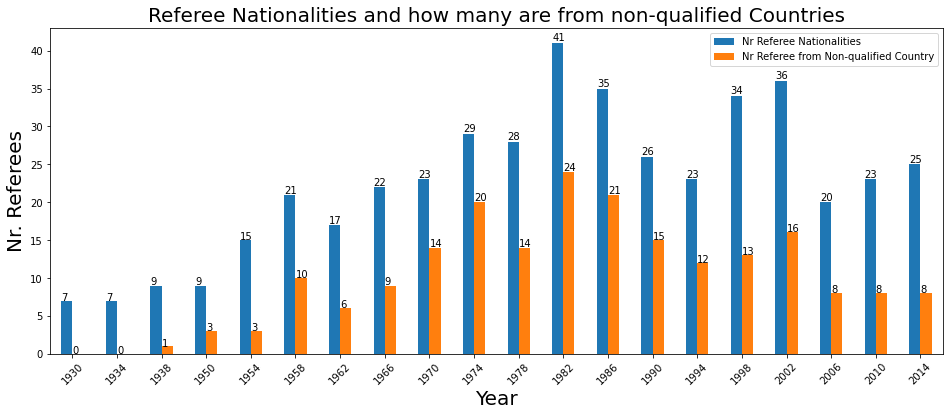

In [27]:
fig, ax = plt.subplots(figsize=(16,6))
all_teams[['Nr Referee Nationalities','Nr Referee from Non-qualified Country']].plot(ax=ax, kind='bar', rot=45)
plt.title('Referee Nationalities and how many are from non-qualified Countries', fontsize=20)
plt.xlabel('Year', fontsize=20)
plt.ylabel('Nr. Referees', fontsize=20)

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.01))

In the first WCs there were almost only referees from participating countries. This has changed over the years and in the last 2 WCs around 1/3 of the referees come from non-participating countries. This has many reasons: Some important countries being left out of recent WCs (and they have good referees) and also more representativity of referees from confederations with less participating countries like Asia and Oceania.

Note that a similar analysis could have been made for the Assistants, by taking into account the columns 'Assistant 1' and 'Assistant 2' from the raw data.

**IMPORTANT: I've not performed a data cleaning in the team initials columns - This would be needed for a more accurate analysis. E.g. The initials GDR (East Germany) and FRG (West Germany) are used together with GER - It is important to check if the participating Country initials and the Referee initials are consistent.**

### 2.2 - Try to estimate total revenue of each World Cup, based only on attendance.

In this <a href="https://observer.com/2018/07/30-years-of-world-cup-tickets-final-match-entry-price-skyrocketed-650/">article</a> there are price ranges for the final match of each World Cup (values in USD). 

- 1990 West Germany vs Argentina: 60 to 475
- 1994 Brazil vs Italy: 60 to 475
- 1998 France vs Brazil:  46 to 390
- 2002 Germany vs Brazil: 264 to 660
- 2006 Italy vs France:  140 to 700
- 2010 Netherlands vs Spain: 150 to 900
- 2014 Germany vs Argentina: 440 to 990

Since we have ranges, I've decided to take 2 x the cheapest price as the average (as normally there are much more cheaper than expensive tickets available). <br>
E.g.: Average Price for 1990 final is 60 USD * 2 = 120 USD

These are prices for the final matches, so I will assume here that other knock-out matches were 70% of this value and group matches were 40% of this value, respectively.

- Final in 1990: 120 USD
- Knock-out Match: 120 * 0.7 = 84 USD
- Group Stage: 120 * 0.4 = 48 USD

I'm not calculating the revenue for older (< 1990) Cups as I found no reliable information. <br>
However, one possible approach could be to assume that the average price is 10% less than the previous World Cup. E.g.: Final Match in 1986: 120 USD * 0.9 = 108 USD...


In [28]:
# Lowest prices for the final match in the available source
dict_prices = {
    1990 : 60,
    1994 : 46,
    1998 : 46,
    2002 : 264,
    2006 : 140,
    2010 : 150,
    2014 : 440,
}

def get_price(year,stage):
    if year in dict_prices.keys():
        if stage == 'Final':
            return dict_prices[year] * 2
        elif 'Group' in stage or stage == 'Preliminary round' or stage == 'First round': 
            return dict_prices[year] * 2 * 0.4
        else:
            return dict_prices[year] * 2 * 0.7 # knock-out stages besides the final
    else:
        return 0

df['ticket_price'] = df.apply(lambda x: get_price(x['Year'], x['Stage']), axis=1)

# calculate revenue based on ticket price and attendance
df['revenue'] = round(df['Attendance'] * df['ticket_price'],0)

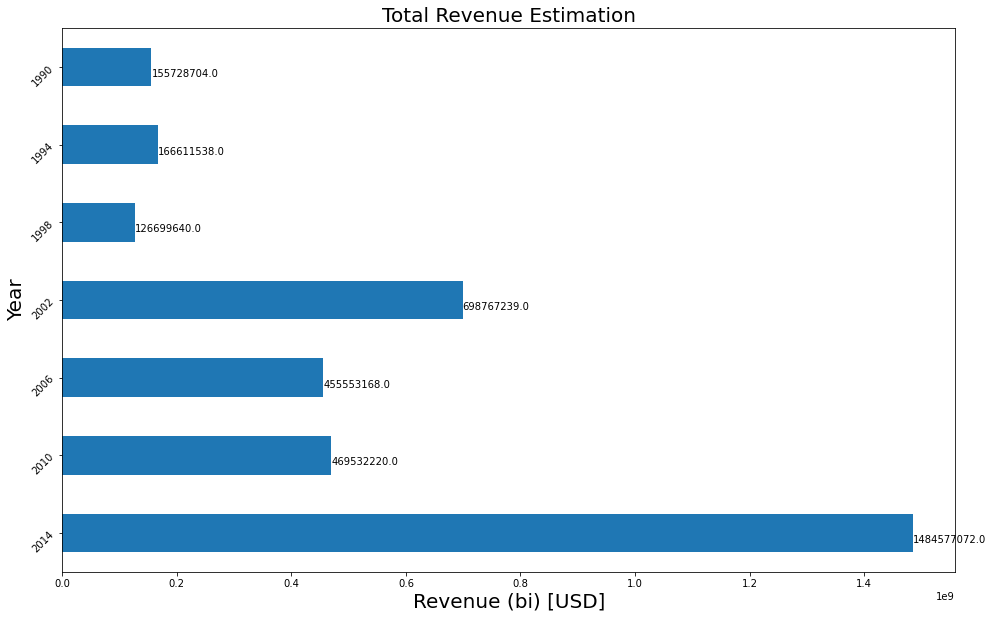

In [29]:
total_attendance = df[df['Year'] >= 1990].groupby('Year')['revenue'].sum()

#plot
fig, ax = plt.subplots(figsize=(16,10))
total_attendance.plot(ax=ax, kind='barh', rot=45)
plt.title('Total Revenue Estimation', fontsize=20)
plt.xlabel('Revenue (bi) [USD]', fontsize=20)
plt.ylabel('Year', fontsize=20)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.38, str((i.get_width())))
    
# invert for largest on top 
ax.invert_yaxis()

As we can see there was a jump in the prices in the World Cup in Asia and a gigantic growth for the World Cup 2014 in Brazil. It is important to note that this analysis is based on very limited data!

### 2.3 - Is there any correlation between number of goals scored per game and altitude of the stadium which hosted the game?
For this task I'm going to request information from the website **freemaptools.com**. It is a 2-step procedure:<br> 1) request the lat/lon for a specific city and <br>2) request the altitude/elevation for those coordinates.

In [30]:
# first cleaning some wrong city names
clean_cities_dict = {
    'Malm� ' : 'Malmö',
    'Norrk�Ping ' : 'Norrköping',
    'D�Sseldorf ' : 'Düsseldorf',
    'La Coru�A ' : 'La Coruña',
    'Colombes ' : 'Paris', # not found in freemaptools.com --> next city Paris
    'Marseilles' : 'Marseille' # not found in freemaptools.com
}

df.replace({"City": clean_cities_dict},inplace=True)
df['City'] = df['City'].str.strip()

I've used the function below to request the required elevation information and I've used a proxy for the connection: if it is not your case, you need to adapt the code accordingly  
**IMPORTANT: The action of populating the dictionary "elevation_dict" does not need to be re-run, - I've stored it in a separate file *elevation_dict.csv* (which I'm also sending you).**

In [31]:
## proxy used by me
#proxies = {
#    'http' : '...',
#    'https' : '...'
#}
#
#def request_lat_lon(proxies, city):  
#    
#    url = 'https://nominatim.openstreetmap.org/search'
#    
#    headers = {
#        'authority': 'nominatim.openstreetmap.org',
#        'sec-ch-ua': '^\\^',
#        'accept': '*/*',
#        'sec-ch-ua-mobile': '?0',
#        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.106 Safari/537.36',
#        'origin': 'https://www.freemaptools.com',
#        'sec-fetch-site': 'cross-site',
#        'sec-fetch-mode': 'cors',
#        'sec-fetch-dest': 'empty',
#        'referer': 'https://www.freemaptools.com/',
#        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
#    }
#
#    params = (
#        ('q', city),
#        ('format', 'jsonv2'),
#        ('addressdetails', '1'),
#    )
#
#    try:
#        return requests.get(url, headers=headers, params=params, proxies=proxies)
#    except Exception:
#        # sleep for a bit in case that helps
#        time.sleep(.1)
#        # try again
#        return request_lat_lon(proxies, city)

In [32]:
#def request_elevation(proxies, lat, lon):  
#    
#    url = 'https://www.freemaptools.com/ajax/elevation-service.php'
#    
#    headers = {
#        'authority': 'www.freemaptools.com',
#        'sec-ch-ua': '^\\^',
#        'accept': '*/*',
#        'x-requested-with': 'XMLHttpRequest',
#        'sec-ch-ua-mobile': '?0',
#        'user-agent': 'Mozilla/5.0 (Windows NT 10.0; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.106 Safari/537.36',
#        'sec-fetch-site': 'same-origin',
#        'sec-fetch-mode': 'cors',
#        'sec-fetch-dest': 'empty',
#        'referer': 'https://www.freemaptools.com/elevation-finder.htm',
#        'accept-language': 'en-GB,en-US;q=0.9,en;q=0.8',
#        'cookie': 'PHPSESSID=c4ebcab4d0aa3ce3eedbb23a17b81738; _ga=GA1.2.875995175.1626261058; _gid=GA1.2.1284477164.1626261058; __gads=ID=ee79cfbed4387793-22b381fc7ac800e5:T=1626261060:RT=1626261060:S=ALNI_MbCbcm_uSvew4NStI-xQ-s1bxrxOQ; FCCDCF=^[^[^\\^AKsRol--8AtbH0bH5dWZ14-rk4FLYcUShV21B1Z584TEMxL73gRM9sXy6AlaXsDv9cmGzhOJmLbWH0rZpSBLOEEhUVXC7TlGG8f7DVFo8tI07IEwPuHxMXdf7O4NLEjltmJgdl5bJPlN1-Ok0xb66H78Z7zDAvC8_A==^\\^^],null,^[^\\^^[^[^],^[^],^[^],^[^],null,null,true^]^\\^,1626262490136^],^[^\\^CPJU76cPJU76cEsABBENBiCoAP_AAG_AAAwIGTpD7T5FbSFCyO55dLsAMAhXRkCEAiQAAASAAmABQAKQAAQCkkAQFASgBAACAAAgICJBAQIMCAgACQABwABAAAAAAAAABAAIIAAAgAEAAAAIAAACAIAAAAAIAAAAEAAAmwgAAIIACBk6A-wuRW0hQkjsaTQ7ACAIUUZAhAIgAAAAgAJgAAACkAAEApBAEAAEoAAAAgAAICAiAQECCAAIAAEAAcAAQAAAAAAAAAAACCAAAIABAAAACAAAAgCAAAAACAAAAAAAAIEIAACCAAgAAA.cgAAAAAAAAA^\\^,^\\^1~1765.1716.1577.2202.1248.574.66.70.2357.1301.93.864.2526.571.108.122.1878.440.1097.2253.167.2571.2373.317.311.184.1276.817.2575.196.89.1365.2072.1201.241.149.338.253.588.259.1211.1095.2568.1651.1449.1570.1205.1051.2299.1171.162.1415.415.1126.1127.1870.449.1753.486.540.495.494.482.2677.981.1889.323^\\^,^\\^5AF0F2A8-22B9-41CA-942F-DEC06BF4F4B6^\\^^],null^]',
#    }
#
#    params = (
#        ('v', '3'),
#        ('lat', lat),
#        ('lng', lon),
#    )
#
#    try:
#        return requests.get(url, headers=headers, params=params, proxies=proxies)
#    except Exception:
#        # sleep for a bit in case that helps
#        time.sleep(.1)
#        # try again
#        return request_elevation(proxies, lat, lon)

In [33]:
#elevation_dict = {}
#
#for city in cities:
#    if city not in elevation_dict:
#        #print(city)
#        r_lat_lon = request_lat_lon(proxies, city)
#        lat = r_lat_lon.json()[0]['lat']
#        lon = r_lat_lon.json()[0]['lon']
#        #request_city = r_lat_lon.json()[0]['address']['city']        
#        
#        r_elev = request_elevation(proxies, lat, lon)
#        elevation_dict[city] = r_elev.json()['elevations'][0]['elevation']
#    else:
#        pass

In [34]:
#import csv
#with open('elevation_dict.csv', 'w') as f:
#    for key in elevation_dict.keys():
#        f.write("%s,%s\n"%(key,elevation_dict[key]))

In [35]:
# Import file to df
df_elev = pd.read_csv('elevation_dict.csv',header=None,encoding='cp1252',names=['City', 'Elevation'])
# change the dtype to int
df_elev['Elevation'] = df_elev['Elevation'].astype(int)

In [36]:
# merge new dataframe containing elevations to the original dataframe based on City
df = pd.merge(df, df_elev, on='City', how='left')

In order to assess the correlation we can use the column created before 'Total Goals' and correlate it with 'Elevation'.
The standard correlation used is pearson. This coefficient, usually represented by ρ, assumes values between -1 (perfect negative correlation) and 1 (perfect positive correlation). Values smaller than 0.1 (or even 0.3) indicate a very weak correlation

**We can see below that the correlation between the city's elevation and the number of goals in a match is -0.031, which can be considered negligible**

In [37]:
df['Elevation'].corr(df['Total Goals'])

-0.03221600761526989

### 2.4 - Provide list of top five teams which scored most of the goals per World Cup, ranked from the one which scored the most of the goals, to the one which scored the least number of goals.

In [38]:
#group by year and team name
grouped_goals_home = df.groupby(['Year','Home Team Name'])['Home Team Goals'].sum().to_frame()
grouped_goals_away = df.groupby(['Year','Away Team Name'])['Away Team Goals'].sum().to_frame()

#concat both df's to retrieve the sum and reset_index
grouped_goals = pd.concat([grouped_goals_home, grouped_goals_away], axis=1).sum(axis=1).to_frame(name = 'Goals')
grouped_goals.reset_index(inplace=True)
grouped_goals.rename(columns={'level_0':'Year','level_1':'Country'}, inplace=True)

In [39]:
grouped_goals_sorted = grouped_goals.sort_values(['Year','Goals'],ascending=False).groupby('Year').head(5)
grouped_goals_sorted

,Year,Country,Goals
407,2014,Germany,18.0
417,2014,Netherlands,15.0
401,2014,Colombia,12.0
398,2014,Brazil,11.0
406,2014,France,10.0
...,...,...,...
0,1930,Argentina,18.0
11,1930,Uruguay,15.0
10,1930,USA,7.0
12,1930,Yugoslavia,7.0


Let's take two World Cups to validate the results:
- 1982 - https://en.wikipedia.org/wiki/1982_FIFA_World_Cup (FIFA retrospective ranking)
- 2002 - https://en.wikipedia.org/wiki/2002_FIFA_World_Cup (FIFA retrospective ranking)

Both years show the correct list

In [40]:
grouped_goals_sorted[(grouped_goals_sorted['Year'] == 2002) | (grouped_goals_sorted['Year'] == 1982) ]

,Year,Country,Goals
299,2002,Brazil,18.0
308,2002,Germany,14.0
323,2002,Spain,10.0
326,2002,Turkey,10.0
311,2002,Korea Republic,8.0
179,1982,France,16.0
173,1982,Brazil,15.0
180,1982,Germany FR,12.0
182,1982,Hungary,12.0
183,1982,Italy,12.0


### 2.5 - Can any connection be found between datetime of the game played and number of goals scored during the game?

For this task I'm going to extract the the day and month from Datetime (which could at least be repeatable across different World Cups) and add it to a new column 'MMDD'

In [41]:
df['MMDD'] = df['Datetime'].dt.strftime('%m%d')

In [42]:
# convert to int in order to be used by the function corr
df['MMDD'] = df['MMDD'].astype('int')

In [43]:
df['MMDD'].value_counts()

619    35
614    34
617    33
615    33
611    32
       ..
728     1
725     1
722     1
721     1
718     1
Name: MMDD, Length: 61, dtype: int64

The most repeated match day in the history of World Cups is 19.June (619: 6 is the month and 19 is the day) - Let's see if the date has any correlation with the 'Total Goals'. <br>As explained in **task 2.3**, we use here the pandas' built-in function .corr, which is based on the pearson method.

Also here the correlation is < 0.3 and can be considered to be very weak.

In [44]:
#.corr(df['Total Goals'])
df['MMDD'].corr(df['Total Goals'])

0.02894686355304926

# Problem 3 - Open Problem - Verifying the role of 'Tradition' in World Cup Finals

In this task I'm going to investigate which teams achieve the final match and if there is a pattern there.

I'm going to use the dataframe created in **Task 1.1** (df_finals_short)

In [45]:
df_finals_short.sort_values('Year')

,Year,Winner,Runner-up
0,1930,Uruguay,Argentina
1,1934,Italy,Czechoslovakia
2,1938,Italy,Hungary
19,1950,Uruguay,Brazil
3,1954,Germany FR,Hungary
4,1958,Brazil,Sweden
5,1962,Brazil,Czechoslovakia
6,1966,England,Germany FR
7,1970,Brazil,Italy
8,1974,Germany FR,Netherlands


Now I'm going to create a function to count if a team reaching the finals is a member of a **tradition's list** - a list with very traditional teams in the World Cup. <br>I will check how often none of these tradition teams were not participating in the final match

I will start by adding **Brazil**, which I know was present in 7 finals

In [46]:
#check if a team participating in the final match is present in the list traditional_teams
def find_in_final(team_a, team_b):
    was_in_final = False
    if team_a in traditional_teams or team_b in traditional_teams:
        was_in_final = True
    return was_in_final

def print_final_statis_info(traditional_teams, df):
    in_final_s = df.apply(lambda x : find_in_final(x['Winner'], x['Runner-up']), axis=1)
    print('>>>Out of {} World Cups, only in {} following teams were not present: {}'.format(len(df), len(df) - in_final_s.sum(), traditional_teams))
    
traditional_teams = ['Brazil']
print_final_statis_info(traditional_teams,df_finals_short)

>>>Out of 20 World Cups, only in 13 following teams were not present: ['Brazil']


Now we can check more teams for fun - Let's add **Italy**

In [47]:
traditional_teams = ['Brazil', 'Italy']
print_final_statis_info(traditional_teams,df_finals_short)

>>>Out of 20 World Cups, only in 9 following teams were not present: ['Brazil', 'Italy']


Now let's add **Germany** and **Argentina**. <br>Note that, since I din't clear all data, I will insert Germany as both 'Germany' and 'Germany FR'

In [48]:
traditional_teams = ['Brazil', 'Italy', 'Argentina', 'Germany', 'Germany FR']
print_final_statis_info(traditional_teams,df_finals_short)

>>>Out of 20 World Cups, only in 1 following teams were not present: ['Brazil', 'Italy', 'Argentina', 'Germany', 'Germany FR']


It is amazing! out of 20 World Cups, in 19 at least one of these four teams was present: 'Brazil', 'Italy', 'Argentina', 'Germany' (The only exception was in 2010: Spain X Netherlands) - This means tradition plays a BIG role in the World Cup

Note: The Final of the World Cup 2018 was France X Croatia: another exception to the "rule" above. Only time will tell how the new football order will look like and if a new tradition is being created. :-)

### TO DOs

- Transform some of the scripts (e.g. plotting) to functions to avoid redundancy and code cleanliness
- Error and Exception handling!
- Clear the 'Home Team Initials' and 'Away Team Initials': They do not always agree with the Country Initials for Referees
- Extend the analysis in 2.1 for the Assistants too
- Look for better sources of information in 2.2 (also some official FIFA Revenue data for comparison?)
- Introduce further sanity checks in the requests used in 2.3
- Improve the groupby statements in 2.4 - I believe they could be improved for simplicity.
- Clear Stadium names (some of them have weird characters); maybe check the type of encoding used.
- Drop some of the unused columns: Since I've only used roughly half of the columns in my analysis, I could have dropped the others. In so a small dataset it would not improve performance a lot but it would improve readability.
- Create a correlation matrix to observe which features are more correlated with the result/number of goals scoredm etc.


### Possible Next Steps
- Prediction the World Cup Winner (who thought of that :-)): Since the World Cup is such a rare event and takes place every 4 years with very different players it is always a challenge to predict the Winner. Of course there are always the favorites (the Tradition in Part 3 could be an interesting feature for the model) <br>
Surely we would need some external data source - one first guess would be the current FIFA Ranking (much more current than the last World Cup results), but even better than that would be the ELO-Ratings. The ELO-Ratings are methods for calculating the relative skill levels of players in zero-sum games, which have been adapted also to Football (https://en.wikipedia.org/wiki/World_Football_Elo_Ratings) and has a higher predictive capability for football matches.<br>
    https://www.eloratings.net/ - ELO-Ratings in Football<br>
    http://www.football-rankings.info/ - A very interesting blog I follow with Football Simulations where the algorithms make use of the ELO-Ratings<br>

- Another interesting analysis would be to gather match details for every single match (ball possession, fouls, shots on target, big chances). Probably this information would be very limited for older World Cups as football analytics is quite a new field. But it would be very interesting to check how football has evolved/changed over time 